# Template set generation from theoratical 

 In this section I am generating template sets with different redshifts from theoretical galaxy spectra. The method is the following. We are assuming a galaxy spectra from different types of theories and each of them is imported into my project. After that I use the filters acquired from László Dobos. With these filters I calculate the flux with the following integral:


\begin{equation}
    F = \frac{\int S(\lambda)r(\lambda)\lambda d\lambda}{c\int r(\lambda)\frac{1}{\lambda}d\lambda}
\end{equation}

 Where c is the speed of light and **r($\lambda$)** is the filter finction while **S($\lambda$)** is the spectral function of the appropiate galaxy. From the following equation the AB magnitude can be generated as follows:
 

\begin{equation}
    m_{AB} = -2.5log_{10}(F) - 48.6
\end{equation}

 For the integrals I used the following numerical method. I didn't rebin the data but I first looked for the minimum and maximum index of the nearest wavelength from the filters end in the spectral distribution. When I found this, I ran through that part of the spectral function and always multiplied the appropiate spectral value with the nearest filter function value according to wavelength. With this method I approximated the integrals and took into account that the wavelengths are in angström.
 
### Acquired data

 I downloaded the filters from [here](http://voservices.net/filter/filterlist.aspx?mode=keyword&keyword=sdss) and used these. The template data is acquired from the Le Phare template set downloaded from [here](http://www.cfht.hawaii.edu/~arnouts/LEPHARE/download.html). The created data is stored and reread by another notebook that uses a measured set and finds the best fitting template values.
 
 The template values are generated by multiplying the wavelengths with (1+z) where z $\in$ [0,1]. I used N steps to raise z from 0 to 1 and update the wavelengths, calculating the magnitues and building the dataframe.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import re

In [3]:
# Not used galaxy spectra from László Dobos
files = listdir(path='./kompozit_dobos_data/data/')
files = np.array(list(filter(lambda x: re.match(r'.*\.spec\..', x), files)))
files.flatten(), files.size

(array(['s_GG.spec.txt', 'l_GG.spec.txt', 'SF4_0.spec.txt',
        'RED2_0.spec.txt', 'p_G.spec.txt', 'SF1_0.spec.txt',
        'l_RG.spec.txt', 'l_G.spec.txt', 'h_G.spec.txt', 'BG.spec.txt',
        'l_BG.spec.txt', 'p_BG.spec.txt', 'h_GG.spec.txt',
        'SF0_0.spec.txt', 'RED4_0.spec.txt', 's_G.spec.txt',
        'SF2_0.spec.txt', 'hh_RG.spec.txt', 't_GG.spec.txt',
        'p_GG.spec.txt', 'G.spec.txt', 'SF3_0.spec.txt', 'hh_G.spec.txt',
        't_BG.spec.txt', 'h_RG.spec.txt', 's_RG.spec.txt',
        'RED1_0.spec.txt', 's_BG.spec.txt', 'hh_GG.spec.txt',
        'p_RG.spec.txt', 't_RG.spec.txt', 'hh_BG.spec.txt',
        'RED0_0.spec.txt', 'h_BG.spec.txt', 'GG.spec.txt', 'RG.spec.txt',
        'RED3_0.spec.txt', 't_G.spec.txt'], dtype='<U15'), 38)

In [4]:
# Reading the files into arrays
def get_spectra_dobos(files):
    spectra = []
    for file in files:
        # Reading text files with Pandas
        data = pd.read_csv('kompozit_dobos_data/data/%s' % file, sep="\t", header=None)
        # Converting from scientific notation
        data = data.apply(pd.to_numeric, args=('coerce',))
        # Using the wavelength and the flux only
        spectra.append(data.values[1:,0:2])
    return np.array(spectra)

In [5]:
spectra_dobos = get_spectra_dobos(files)

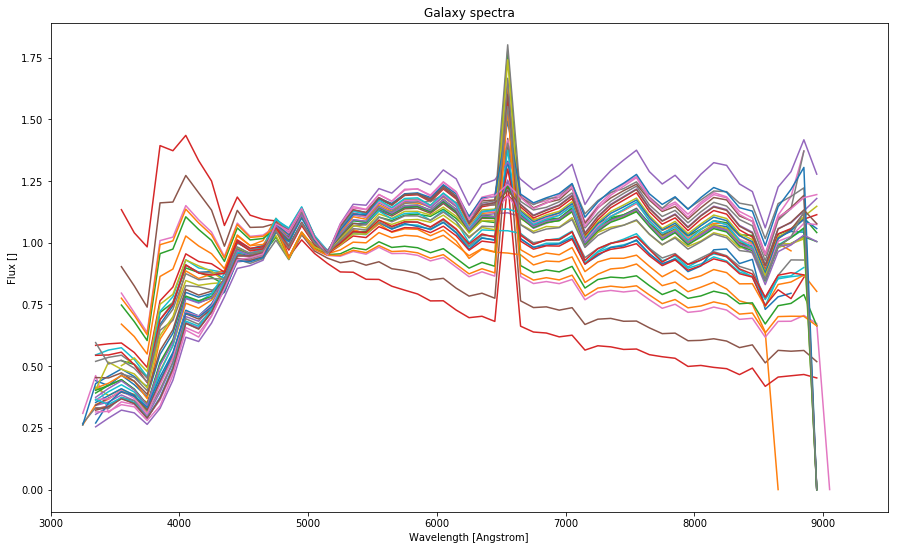

In [6]:
# Plotting all in one
plt.figure(figsize=(15.,9.))
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux []')
plt.title('Galaxy spectra')
# Filter spectrum
plt.xlim(3000,9500)
for i in range(len(spectra_dobos)):
    plt.plot(spectra_dobos[i][:,0][::100], spectra_dobos[i][:,1][::100])
plt.savefig('dobos-spectra.png', dpi=300)

### It will become evident later that these spectral functions cannot be used without modification since the do not cover the whole spectrum and thus they cannot be just evidently multiplied with the filters.

In [7]:
def get_lephare_spectra():
    # Reading the Le Phare sepctra
    dirs = listdir(path='lephare_dev/sed/GAL/')
    files = np.array([])
    spectra = []
    filenames = []
    for dr in dirs:
        # Some kind of bug, dirs read with ._ at the beginning
        if(dr[0] != "."):
            files = listdir(path='lephare_dev/sed/GAL/%s/' % dr)
            file_names = np.array(list(filter(lambda x: re.match(r'.*\.sed', x), files)))
            for file in file_names:
                # Some kind of bug, dirs read with ._ at the beginning
                if(file[0] != "."):
                    # Due to erros in file formatting
                    try:
                        # Reading in %.3f format
                        pd.set_option('display.float_format', lambda x: '%.3f' % x)
                        # Read with any whitespace separator (still some errors)
                        data = pd.read_csv('lephare_dev/sed/GAL/%s/%s' % (dr, file), sep=r"\s*",
                                           header=None, engine='python')
                        # Numeric 
                        data = data.apply(pd.to_numeric, args=('coerce',))
                        data = data.dropna(axis='rows')
                        if(len(data.values.shape) > 1 and data.values.shape[0] != 0 and data.values.shape[1] != 0):
                            filenames.append('lephare_dev/sed/GAL/%s/%s' % (dr, file))
                            #print(data.values[:, 0:2])
                            spectra.append(data.values[:, 0:2])
                    finally:
                        # Progress bar
                        print('=', end='')
    # End progress bar
    print(">\t", len(spectra))
    return np.array(spectra), np.array(filenames)

### Reading the Le Phare spectra still produces some error logs due to the mismatch in the data files.

In [8]:
lephare_spectra, filenames = get_lephare_spectra()
lephare_spectra.shape, filenames.shape

/home/alex.olar@odigeo.org/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/alex.olar@odigeo.org/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


===========================================================================================================================================================================================================================================================================================================>	 299


((299,), (299,))

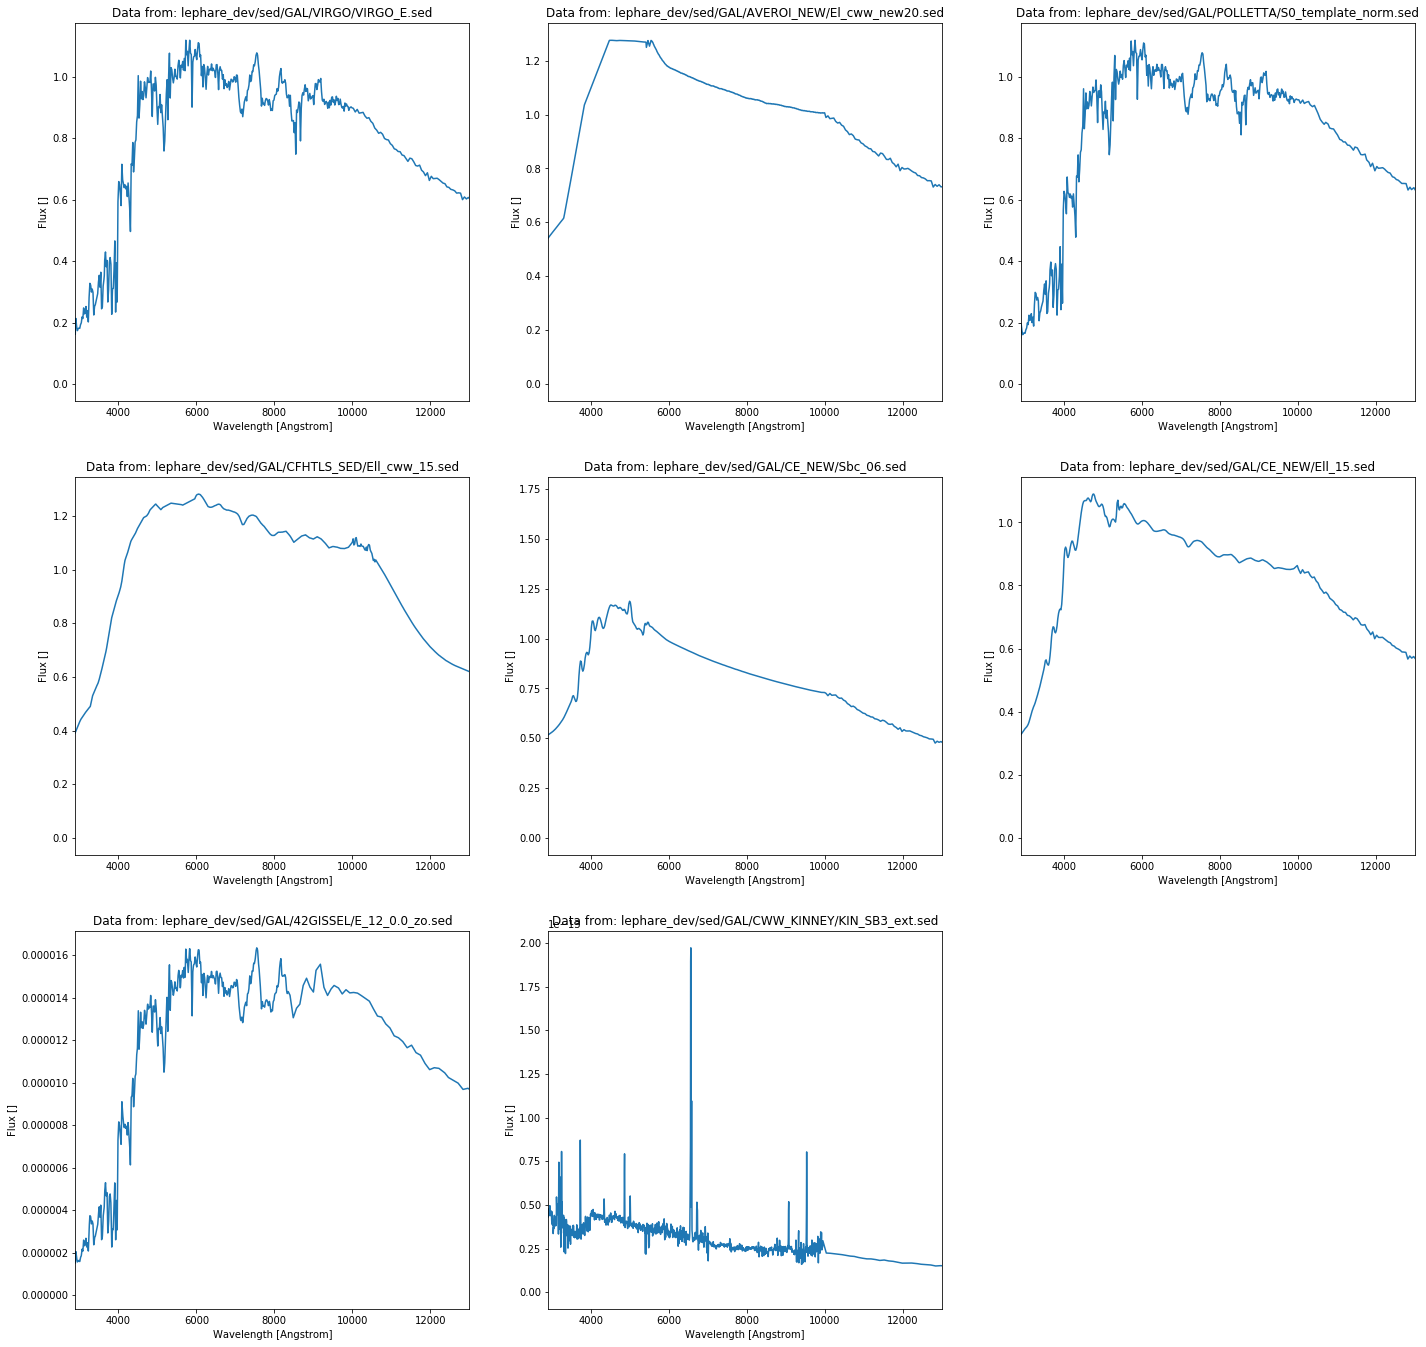

In [9]:
i = 1
plt.figure(figsize=(24, 32))
for j in range(0, lephare_spectra.size, 42):
    plt.subplot(int('43%d' % i))
    i += 1
    plt.xlim(2900,13000)
    plt.title('Data from: %s' % filenames[j])
    plt.xlabel('Wavelength [Angstrom]')
    plt.ylabel('Flux []')
    plt.plot(lephare_spectra[j][:,0], lephare_spectra[j][:,1])
plt.savefig("example-spectra.png", dpi=300)

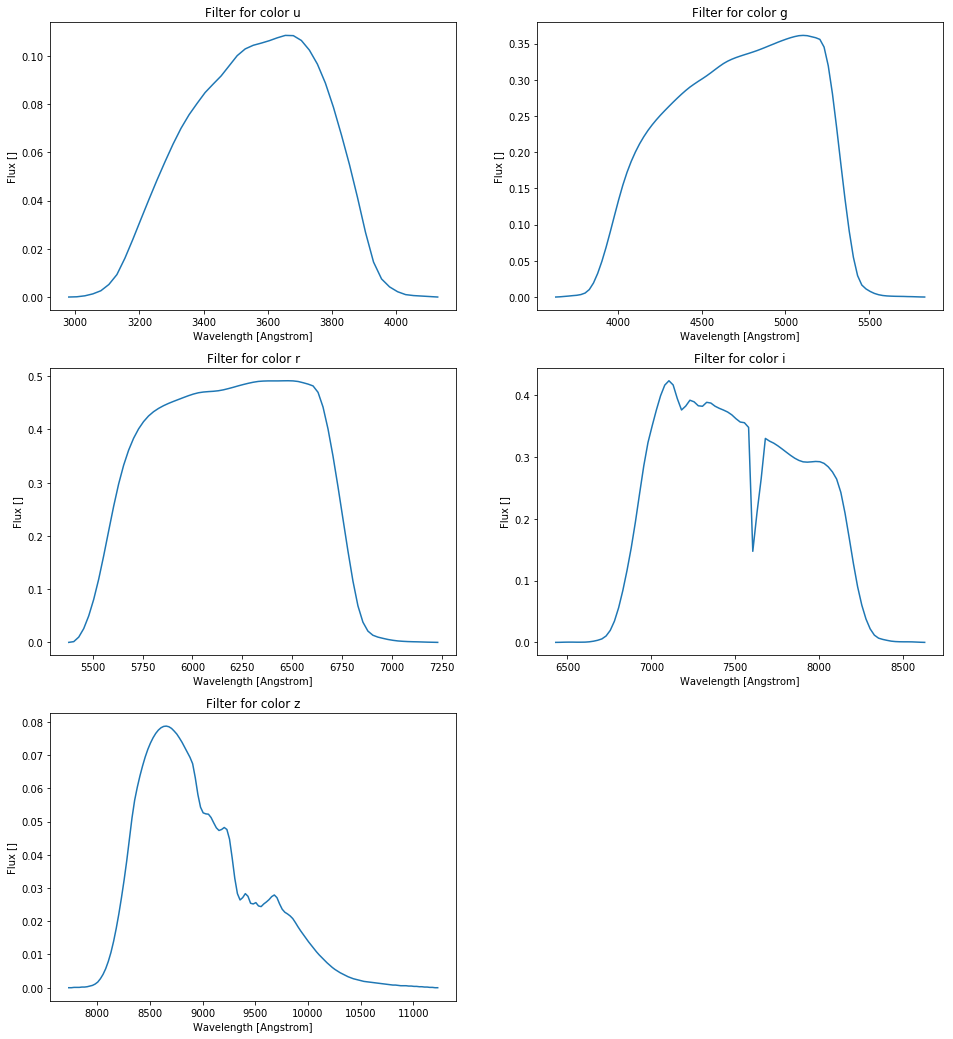

In [10]:
colors = ['u', 'g', 'r', 'i', 'z']
filters = np.array([pd.read_csv('./SDSS_%s\'.txt' % c, sep=r"\s", header=None, engine='python').values for c in colors])

plt.figure(figsize=(16.,18.))
for ind, color in enumerate(colors):
    plt.subplot(int("32%d" % (ind+1)))
    plt.title('Filter for color %s' % color)
    plt.xlabel("Wavelength [Angstrom]")
    plt.ylabel("Flux []")
    plt.plot(filters[ind][:,0], filters[ind][:,1])
plt.savefig("filters.png", dpi=300)

In [11]:
from scipy import signal

### Here is the above mentioned magnitude calculating function

In [11]:
from sklearn.neighbors import NearestNeighbors

def get_spectrum(spectrum, color_filter):
    # min/max wavelength
    min_lambda = color_filter[:,0][0]
    max_lambda = color_filter[:,0][-1]
    
    # find nearest min/max indices
    min_nearest_ind = np.abs(spectrum[:,0]-min_lambda).argmin()
    max_nearest_ind = np.abs(spectrum[:,0]-max_lambda).argmin()
    
    # integral of response function
    c = 3*10**8
    bin_width = color_filter[:,0][1] - color_filter[:,0][0]
    filter_integral = c*np.sum(color_filter[:,1]/color_filter[:,0])*10**10 # dimension correction
    
    flux = 0.
    
    # NN algorithm
    neigh = NearestNeighbors(n_neighbors=1, algorithm='kd_tree')
    neigh.fit(color_filter[:,0].reshape(-1, 1))
    
    for ind, val in enumerate(spectrum[:,0][min_nearest_ind:max_nearest_ind]):
        nearest_ind = neigh.kneighbors(np.array([val]).reshape(1, -1), return_distance=False)[0,:][0]
        flux += color_filter[:, 1][nearest_ind]*spectrum[:,1][ind]*val*10**(-10) # dimension correction
    return -2.5*np.log10(flux/filter_integral) - 48.60

### By default 50 steps.

In [12]:
def build_dataframe_from_template(_spectra, _colors, _N=50):
    data = []
    spectra = _spectra.copy()
    colors = np.append(_colors, ['redshift'])
    for z in np.linspace(0.,1.,_N):
        for j in range(0, spectra.shape[0]):
            row = []
            spectrum = spectra[j].copy()
            spectrum[:,1] *= (1.+z)
            for i in range(filters.size):
                # magnitudes and redshift
                row.append(get_spectrum(spectrum, filters[i]))
            row.append(z)
            data.append(row)
    # Building dataframe \w column names
    return pd.DataFrame(data, columns=colors)

In [ ]:
template_data = build_dataframe_from_template(lephare_spectra, colors, 100)

In [ ]:
template_data